### Лабораторная работа №5
#### Идентификация параметров линейного регрессионного объекта при α− загрязненных шумах

Пусть линейный регрессионный объект имеет вид:
$$ \large y(i)=с_{0}+с_{1}u_{1}(i)+...+с_{4}u_{4}(i)+\eta(i) , $$ 

где шум, действующий на объект, принадлежит классу приближенно нормальных распределений:
$ \large f(\eta) = (1-\alpha)f_N(\eta) + \alpha g(\eta) $ <br>
$ \large f_N(\eta) = \frac{1}{\sqrt{2 \pi} \sigma_\eta} exp(- \frac{\eta^2}{2 \sigma^2_\eta}) $ - нормальное распределение $ \large N(0, \sigma_\eta)$, <br>
$\large \alpha$ - вероятность появление выброса с рапределением $\large g(\eta)$ <br>
$\large g(\eta)$ - вообще говоря какое-то распределение, но в данной лабораторной работе будет нормальным $ \large N(0, \sigma_\eta (outlier))$, но его параметры отличны от $\large f_N(\eta)$

In [6]:
# количество измерений
N=200

#### Сгенерируем шум, принадлежащий классу приближенно нормальных распределений

In [7]:
import numpy as np
from scipy.stats import rv_continuous

In [8]:
# параметры объекта 
c = np.array([-12.7, 4.3, -1.8, 9.1, 2.4])

In [9]:
# класс для "загрязненного" распределения
class gaussian_gen(rv_continuous):
    
    def _pdf(self, x, alpha, sigma_1, sigma_2):
        "Gaussian distribution"
        def gaussian(self, x, sigma):
            return np.exp(-x**2 / 2. / sigma**2) / (np.sqrt(2.0 * np.pi)*sigma)
        
        return (1-alpha)*gaussian(self, x, sigma_1)+alpha*gaussian(self, x, sigma_2)

gaussian = gaussian_gen(name='dirty_distrib')

Зададим следующие параметры нашего загрязненного распределения для шума:

In [10]:
psi=0.9
alpha = 0.1
sigma_1 = 0.5
sigma_2 = 10
Noise = gaussian.rvs(alpha, sigma_1, sigma_2, size=N)

#### Посмотрим на сгенерированный шум и увидим "выбросы" из другого распределения

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

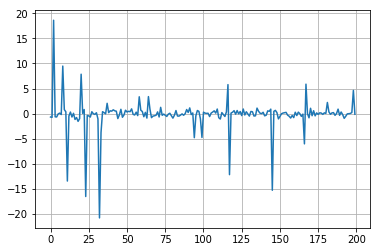

In [12]:
plt.plot(Noise)
plt.grid()

#### Зададим параметры входов объекта и смоделируем выход объекта

In [13]:
#Ваш код здесь
Avg = [1, 1, 1, 1, 1]
Var = [0, 100, 100, 100, 100]

U = np.array([np.random.normal(AvgX, VarY, size=N) for AvgX, VarY in zip(Avg, Var)])

In [14]:
# моделирование выхода объекта
y=c@U + Noise

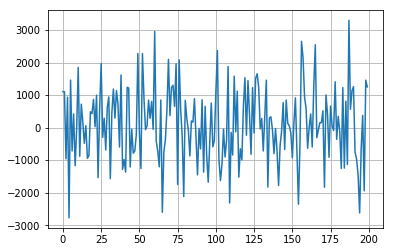

In [15]:
plt.plot(y)
plt.grid()

### Эффективность алгоритма Хубера vs Рекуррентным МНК при различных статистических характеристиках распределений

В лабораторной работе требуется:

1. Реализовать __class Huber__ c методами: <br>
   * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br>
    2) параметр $ \xi $, участвующий в функции потерь Хьюбера, в зависимости от вероятности появления выброса $ \alpha $ (значения которого приведены в описании ЛР) <br><br>
   *   __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием функции потерь Хьюбера:<br>
        <br>
        Input:<br>
            X - матрица входов объекта, [X] = m x N <br>
            y - вектор выходов объекта, [y] = N <br>
            с0 - вектор начального приближения, [c0] = m <br>
        <br>       
   * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_huber - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>
2. Реализовать __class RecurrentMLS__ с методами: <br>

    * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br><br>

    * __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием квадратичной функции потерь (см. 2 лабораторную работу):<br>
         <br>
     Input:<br>
             X - матрица входов объекта, [X] = m x N<br>
             y - вектор выходов объекта, [y] = N<br>
             с0 - вектор начального приближения, [c0] = m+1<br><br>
        
    * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_recMLS - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>        
3. Реализовать функцию __smooth_errors(c_estim, c_true)__  - вычисляет сглаженную ошибку оценки по 10 измерениям. <br>
         Input: 
             c_estim - массив оценок параметров объекта, [c_estim] = m+1 x N
             c_true - вектор истинных параметров объекта, [c_true] = m+1 
         Output:
             err - массив сглаженных ошибок оценки
              
4. Провести исследование эффективности алгоритма Хубера по сравнению с рекуррентным МНК алгоритмом при следующих статистических характеристиках распределений:<br>
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 100;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 100. <br><br>
5. Построить графики сходимости сглаженной ошибки оценки по двум алгоритмам: алгоритм с использованием теоремы Хубера и рекуррентный алгоритм, соответствующий методу наименьших квадратов. Сдалать выводы.

### Hints

1. Рекуррентный алгоритм при функции потерь Хьюбера имеет вид:
\begin{equation} \large \hat{\vec{c}}(i)=\hat{\vec{c}}(i-1)+Г(i)d(\varepsilon(i, \hat{\vec{c}}(i-1)))\vec{z}(i) \\
\large Г(i)=Г(i-1)-\frac{Г(i-1)\vec{z}(i)\vec{z}(i)^TГ(i-1)}{I^{-1}_F+\vec{z}^T(i)Г(i-1)\vec{z}(i)} \\
\large Г(0)=\lambda I, \lambda >> 1,  \hat{\vec{c}}(0)=\vec{c}_{0}\end{equation}

где $ \large  \Delta = \xi\sigma_\eta$
\begin{equation} \large d(\varepsilon(i, \hat{\vec{c}}(i-1)))=\frac{dF(\varepsilon(i, \hat{\vec{c}}(i-1)))}{d\varepsilon}|_{\varepsilon = \varepsilon(i, \hat{\vec{c}}(i-1)))}= \left\{
    \begin{array}\\
        -\Delta, & \varepsilon(i) \leq -\Delta \\
        \varepsilon(i, \hat{\vec{c}}(i-1))), & -\Delta \leq |\varepsilon(i)| \leq \Delta\\
        \Delta, &  \varepsilon(i) \geq \Delta
    \end{array}  
\right.\end{equation}

\begin{equation} \large  I_F=2(1-\alpha)\frac{\Delta}{\sigma^2_\eta}f_N(\frac{\Delta}{\sigma_\eta})+(1-\alpha)\frac{1}{\sqrt{2\pi}\sigma_\eta}\frac{1}{\sigma^4_\eta}\int_{-\Delta}^\Delta \eta^2exp(\frac{-\eta^2}{2\sigma^2_\eta})d\eta\end{equation}

2. Для вычислении информации Фишера можно использовать модуль __sympy__ (https://docs.sympy.org/latest/modules/integrals/integrals.html)

In [60]:
import math
from scipy.integrate import quad

class Huber:
    def __init__(self, lamb, psi):
        self.lamb = lamb
        self.psi = psi
        
        ####--------------
        # Fisher_inf
        self.delta = self.psi * sigma_1
        def integral(eta):
            return eta ** 2 / math.exp((eta / sigma_1) ** 2 / 2)
        
        def fN(eta):
            return math.exp( -0.5*((eta / sigma_1)**2)) /((2 * math.pi * (sigma_1**2)) ** 0.5) 

        self.If = (1 - alpha)*(2*self.delta * fN(self.psi)/ (sigma_1**2) + 
         quad(integral, -self.delta, self.delta)[0] / ((2 * math.pi ** 0.5)* (sigma_1**5)))
        ####-----------
        self.c_estim_huber = []
       
    
    def fit(self, X, y, c0):
        self.c_estim_huber.append(c0)
        C = c0
        G = self.lamb * np.eye(5)
        for i in range(N):
            y_hat = C @ X[:,i]
            eps = y[i] - y_hat
            if eps <= -self.delta:
                eps = -self.delta
            elif eps >= self.delta:
                eps = self.delta
            
            z = X[:,i].T    
            G = G - G * z * z.T * G / (1/self.If + z.T * G * z)
            C = C + G * eps @ z
            self.c_estim_huber.append(C)
    
    def get_coefs(self):
        return self.c_estim_huber
    
class RecurrentMLS:
    def __init__(self, lamb):
        self.lamb = lamb     
        self.c_hat = []
    
    def fit(self, X, y, c0):
        C = c0
        self.c_hat.append(c0)
        G = self.lamb * np.eye(5)
        for i in range(N):
            y_hat = C @ X[:, i]
            eps = y[i] - y_hat
            z = X[:,i]   
            G = G - G * z * z.T * G / (1 + z.T * G *z)
            C = C + G * eps @ z
            self.c_hat.append(C)
    
    def get_coefs(self):
        return self.c_hat

In [97]:
def error(c_estim, c_true):
    res = []
    for i in range(9, N):
        err = 0
        for j in range(10):
            err += sum((c_estim[i - j] - c_true) ** 2)
        err /= 10
        err = err ** 0.5
        res.append(err)

    return res

Прогоним по всем вариантам. При сигме = 100 ловлю оверфлоу, убрал из значений

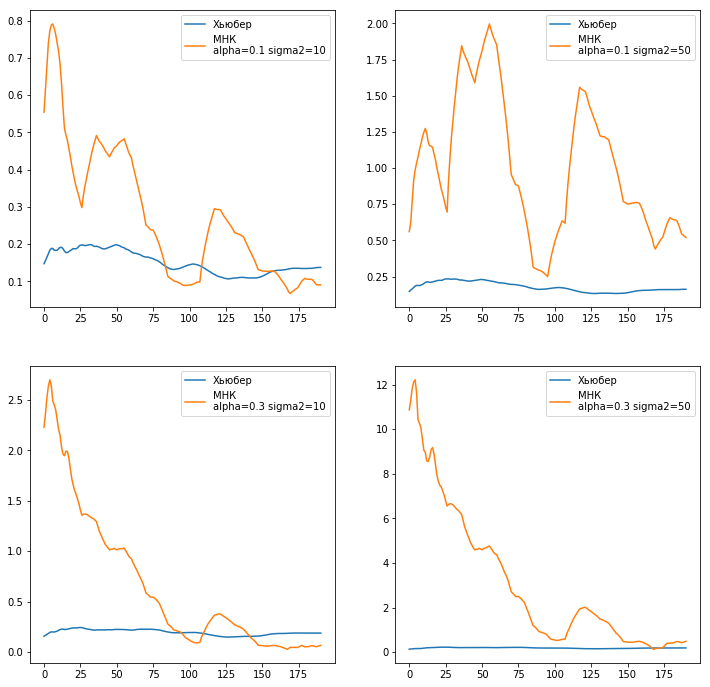

In [110]:
fig, [[f1, f2], [f3, f4]] = plt.subplots(2, 2, figsize=(12, 12))
t = ((f1, f2),(f3, f4))

for i, alpha_ in enumerate([0.1, 0.3]):
    for j, sigma_ in enumerate([10, 50]):
        np.random.seed(44)
        #Noise
        alpha = alpha_
        sigma_2 = sigma_          
        Noise = gaussian.rvs(alpha, sigma_1, sigma_2, size=N)
        
        #output
        y=c@U + Noise
    
        #init
        a = Huber(0.1, psi)
        b = RecurrentMLS(0.1)
        
        #fit
        a.fit(U, y, c)
        b.fit(U, y, c)
        
        #predicts
        huber = a.get_coefs()
        mls   = b.get_coefs()
    
        t[i][j].plot(error(huber, c), label=f'Хьюбер')
        t[i][j].plot(error(mls, c), label=f'МНК\nalpha={alpha} sigma2={sigma_2}')
        #t[i][j].title(f"Сглаженные ошибки при alpha={alpha} sigma2={sigma_2}")
        t[i][j].legend()
